### **Real Estate Project - Price Predictor**

In [735]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [736]:
housing = pd.read_csv('Data.csv')

In [737]:
# housing.head # It gives the first five rows of the data
# housing.info
# housing['CHAS'].value_counts()
# housing.describe()


In [738]:
# housing.hist(bins=50, figsize= (20, 15)) # Makes histogram for each attribute

##### Train-Test Splitting

In [739]:
# For learning purpose
# By making a functiom you have split the data in the below steps

def split_train_test(data, test_ratio) :
    np.random.seed(42) # This statement will shuffle the data only one time even after you run it again and again
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size] # It will take the row of the data from 0 to test_set_size
    train_indices = shuffled[test_set_size :] # It will take the row of the data from test_set_size to end
    # print(test_indices)
    # print(train_indices)
    return data.iloc[train_indices], data.iloc[test_indices] # iloc will gives the no of rows as mention in the square brackets

In [740]:
# train_set, test_set = split_train_test(housing, 0.2)

In [741]:
print(f"Rows in train set : {len(train_set)} \nRows in test set : {len(test_set)}\n")

Rows in train set : 404 
Rows in test set : 102



In [742]:


from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set : {len(train_set)} \nRows in test set : {len(test_set)}\n")

Rows in train set : 404 
Rows in test set : 102



In [743]:
# StratifiedShuffleSplit splits the dataset By using this you will split the data in a such way that 0 and 1 will be in 
# proper amount in both test and training set.

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']) :
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [744]:
strat_test_set.info()
strat_test_set['CHAS'].value_counts()
# strat_train_set['CHAS'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       100 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


0    95
1     7
Name: CHAS, dtype: int64

In [745]:
housing = strat_train_set.copy()

#### Looking for Correlations

In [746]:
corr_matrix = housing.corr()  # corr() It is a pandas function used to find the pairwise correlation of all columns in the dataframe
# The below statement will tell us that if we increase the 'MEDV' values then what will be the impacct on other features.
# '1' Means high +ve correlation
corr_matrix['MEDV'].sort_values(ascending = False)


MEDV       1.000000
RM         0.679498
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

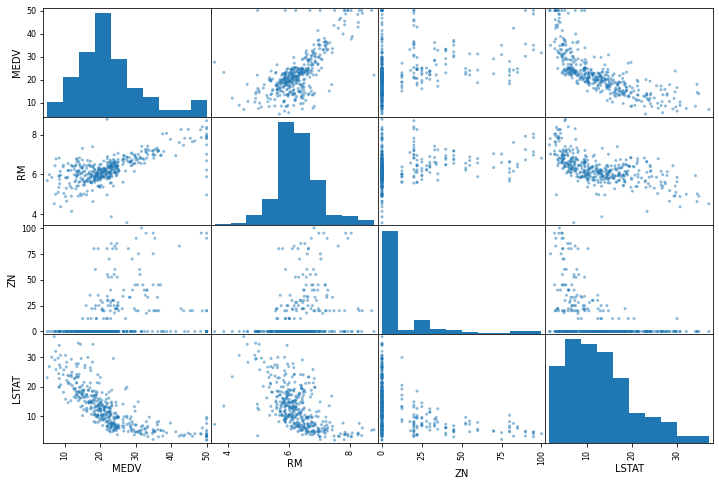

In [747]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM", "ZN", "LSTAT"]
# The plots have histograms in the diagonal because x and y axis are having the same feature
scatter_matrix(housing[attributes], figsize=(12, 8))
#Plot RM-MEDV and RM-LSTAT is a good plot because they are having high +ve and -ve relationship


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

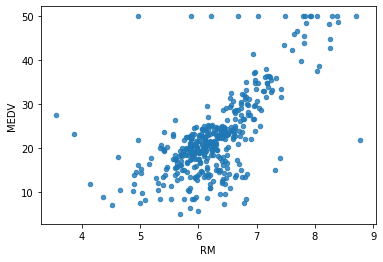

In [748]:
# We are making a scatter plot here so we can remove the cap points because if RM is 5 then 50 lakh price is ok but if it is 9 then 50 lakh price is not good 
housing.plot(kind = 'scatter', x='RM', y='MEDV', alpha = 0.8)


## Trying out attribute combination

In [749]:
# You can add a new attribute. We have added a new attribute TAXRM which tax per room
housing['TAXRM'] = housing['TAX']/housing['RM']
housing['TAXRM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [750]:
corr_matrix = housing.corr()  
corr_matrix['MEDV'].sort_values(ascending = False)
# We have got a highly -ve relation between TAXRM and MEDV

MEDV       1.000000
RM         0.679498
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.527826
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

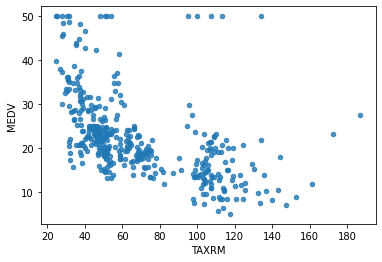

In [751]:
housing.plot(kind = 'scatter', x='TAXRM', y='MEDV', alpha = 0.8)

In [752]:
# Here we have separated the features in housing and labels in housing_labels
print(housing)

housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
254  0.04819  80.0   3.64     0  0.392  6.108  32.0  9.2203    1  315   
348  0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280   
476  4.87141   0.0  18.10     0  0.614  6.484  93.6  2.3053   24  666   
321  0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
326  0.30347   0.0   7.38     0  0.493  6.312  28.9  5.4159    5  287   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
155  3.53501   0.0  19.58     1  0.871  6.152  82.6  1.7455    5  403   
423  7.05042   0.0  18.10     0  0.614  6.103  85.1  2.0218   24  666   
98   0.08187   0.0   2.89     0  0.445  7.820  36.9  3.4952    2  276   
455  4.75237   0.0  18.10     0  0.713  6.525  86.5  2.4358   24  666   
216  0.04560   0.0  13.89     1  0.550  5.888  56.0  3.1121    5  276   

     PTRATIO       B  LSTAT  MEDV       TAXRM  
254     16.4  392.89   6.57  21.9   51.571709  
348     17.0  390.94   5.99

### Missing attributes

In [753]:
# To take care of missing attributes 
#   1. Get rid of the missing data points
#   2. Get rid of the whole attribute
#   3. Set the value to some value(0, mean or median)
# ================ Go for third option most of the times ================

In [754]:
a = housing.dropna(subset=['RM']) # Option 1
a.shape
# Note that the housing dataframe will remain unchanged

(401, 13)

In [755]:
b = housing.drop('RM', axis = 1) # option 2
b.shape
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

(404, 12)

In [756]:
median = housing['RM'].median() 
print(median)

6.211


In [757]:
# It will fill the blank spaces with the median.
housing['RM'].fillna(median)
housing.shape
# Note that original dataframe will remain unchanged

(404, 13)

In [758]:
housing.describe() # Before we started missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281858,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714766,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [759]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)
# This will fill the blank spaces in the databases with the median

SimpleImputer(strategy='median')

In [760]:
imputer.statistics_ # Median of all the rows

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [761]:
imputer.statistics_.shape

(13,)

In [762]:
X = imputer.transform(housing)

In [763]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [764]:
housing_tr.describe()
# You will see here that the count of RM here is 404 and in the housing dataset above it was 401

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281332,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712127,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

 Primarlly, three types of objects

 1. Estimators - It estimates some parameter based on a dataset eg : imputer
 It has a fit method and transform method.
 Fit method - Fits the dataset and calculates internal parameters

 2. Transformers - tranform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transform.  

 3. Predictors - LinearRegression model is an example of predictor. fit() and predict()
 are two common function. It also gives score() function which will evaluate the prediction.

## Feature Scaling 

Primarily, two types of feature scaling methods :
1. Min-max (Normaliztion)
     (value - min)/(max-min)
     Sklearn provides a class called MinMaxScaler for this.
 
2. Standardization
      (value - mean)/std, std is Standard Scaler
      Sklearn provides a class called Standard Scaler for this

## Creating a Pipeline

In [765]:
# Whatever you have done above can be done using the below statements

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # .... add as many as you want in your pipeline 
    ('std_scaler', StandardScaler()),
])

In [766]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [767]:
housing_num_tr # It is a numpy array

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [768]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Real Estate Project

In [769]:
# You can try as many model you want for obtaining good results

# =========== Choosing a desired model here ===========

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [770]:
some_data = housing.iloc[:5]

In [771]:
some_labels = housing_labels.iloc[:5]

In [772]:
prepared_data = my_pipeline.transform(some_data)

In [773]:
model.predict(prepared_data)

array([22.4  , 25.649, 16.218, 23.295, 23.529])

In [774]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [775]:
# mse --> Mean squared error
# rmse --> root mean squared error

from sklearn.metrics import mean_squared_error
housing_predicitons = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predicitons)
rmse = np.sqrt(mse)


In [776]:
rmse # Using Linear Regression we got rmse 4.83 which is not a good value it has to be low 

# When you change the model to decision tree from Linear Regression then you will get 0.0 which means that model is overfitted our model has understand the data completely which is not a good thing as it is having no error.
# Never the root mean squared error will be 0 because that means it is overfitted

1.209625815639441

## Using better evaluation technique - Cross Validation

In [777]:
# 1 2 3 4 5 6 7 8 9 10 
# In cross validation you will separate the data for say into 10 groups. 1st you will train the data from 2-10 by selecting a model and test it on 1 then test on 2 and train it on remaining by selecting other model and so on. 

# For mean square error(mse) lower is better but cross validation is greater is better that is utility therefore we have taken neg_mean_squared_error
# cv = 10 groups

# After applying cross validation you will see that you also get good rmse values for Linear Regressor

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores) # Multiplying by -1 


In [778]:
rmse_scores 

array([2.79458182, 2.88048966, 4.40224092, 2.60545912, 3.50680035,
       2.64887326, 4.62813517, 3.40684387, 3.03226888, 3.2702571 ])


   1. Linear Regression (rmse) :  4.83. 
   2. Decision Tree (rmse) : 0.0  (Not good since overfitted), 
   3. Random  Forest Regressor : 1.205217496085783

In [779]:
def print_scores(scores):
    print(f'Scores : {scores}')
    print(f'Mean : {scores.mean()}')
    print(f'Standard deviation : {scores.std()}')

In [780]:
print_scores(rmse_scores)

Scores : [2.79458182 2.88048966 4.40224092 2.60545912 3.50680035 2.64887326
 4.62813517 3.40684387 3.03226888 3.2702571 ]
Mean : 3.3175950146668236
Standard deviation : 0.6663571374979211


By using all the models we conclude that RandomForestRegressor is the best model for this problem

Quiz : Convert this notebook into python file and run the pipeline using colab.
Create another notebook import the joblib there and test the test_set

## Save this system using Joblib
### By using Joblib you can save your model

In [781]:
from joblib import dump, load
dump(model, 'Real_Estate_Project.joblib')

['Real_Estate_Project.joblib']

## Testing the model on test data

In [782]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[24.552 11.462 26.082 22.315 18.074 14.792 20.211 14.462 32.348 41.079
 19.811 11.661 24.449 25.625 19.575 10.996 32.119 14.285 23.939 18.034
 19.857 17.837 16.698 22.231 18.599 31.655 16.934 33.087  8.613 33.819
 24.485 21.415 22.987 10.818 20.828 11.448 42.108 24.44  23.166 42.08
 23.911 29.53  20.594 20.999 18.356 32.964 44.051 20.098 20.241 21.287
 21.881 14.689 21.729 14.788 24.868 32.545 40.618 28.742 20.955 20.813
 46.743  9.407 19.068 25.371 15.038 33.124 20.093 17.762 18.963 34.387
 27.161 22.979 21.543 22.16  34.826 13.269 15.765 20.08  20.931 21.125
 22.935 21.141 14.158 23.403 20.746 21.532 14.035 21.539 21.884 23.12
 18.924 27.081  7.31  26.654 18.786 29.816 19.819 30.94  14.617 27.443
 21.591 20.27 ] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 

In [783]:
final_rmse # 2.93 is a good score

2.9658876857874903

Things to be noted in this project.
1. We have used a very small data.
2. We have not fine-tune the model.
3. We have used only three models we could have gone for many models and you should use more models

In [785]:
prepared_data[0] # First row file

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24370178, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model


In [787]:
from joblib import dump, load
import numpy as np
model = load('Real_estate_Project.joblib') # Load the whole Real_estate project
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.25370178, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]]) 
model.predict(features)

array([22.4])